In [4]:
import numpy as np
import det_prob_plot as det
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [5]:
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2023/exeter/fits'
file_list = ['cc_adi_bckg1_mag7_M_CVC_exeter_all_effects.fits',
             'cc_adi_bckg1_mag7.5_M_CVC_exeter_all_effects.fits',
             'cc_adi_bckg1_mag8_M_CVC_exeter_all_effects.fits'
             ]
file_mag_list = [7,7.5,8]
stellar_mag_list = [7.153, 
                    7.312,
                    7.36,
                    7.490,
                    7.48,
                    7.42,
                    7.564,
                    7.738,
                    7.759,
                    7.828,
                    7.084,
                    7.21,
                    7.297,
                    7.226,
                    7.411,
                    7.385,
                    7.568,
                    7.362,
                    7.732,
                    7.901,
                    7.433,
                    7.562,
                    7.471,
                    7.851,
                    8.061]
star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
filter_name_list = ['MKO_Mp']*25
band_list = ['M']*25
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/UCL-LCC_M'
distance = [93,
102,
108,
107,
103,
107,
113,
115,
108,
119.6,
95.1,
98.1,
101.5,
95.7,
96.3,
109.6,
113.9,
110.7,
112.4,
123.5,
107.5,
97.0,
111.0,
120.5,
125.0]
age = [16]*25

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP55334, a 16 Myrs, 7.153 Mag Star at 93 pc time elapsed - 00:00:01.33
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP57950, a 16 Myrs, 7.312 Mag Star at 102 pc time elapsed - 00:00:01.17
The 'MKO_Mp' filter is found in the list of available fil

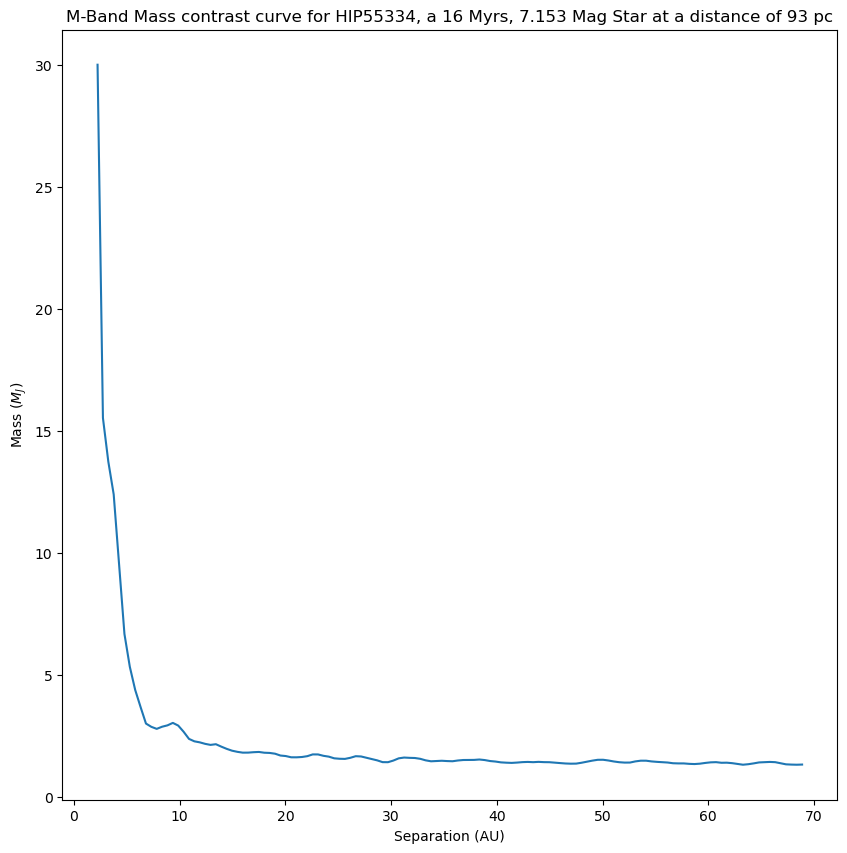

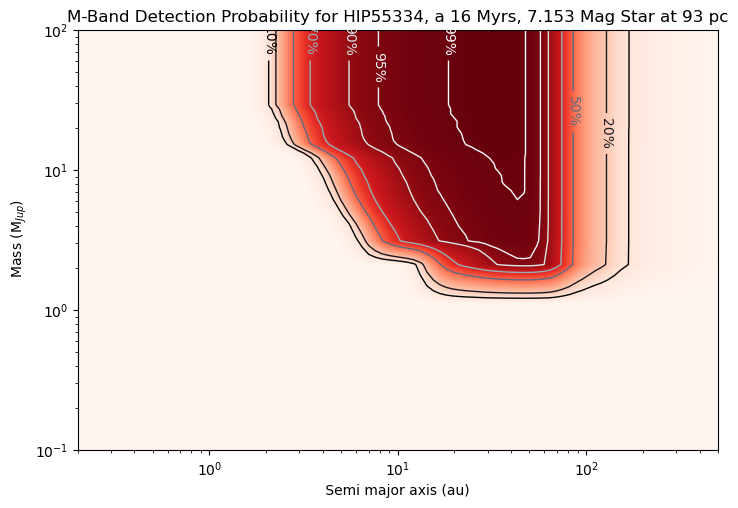

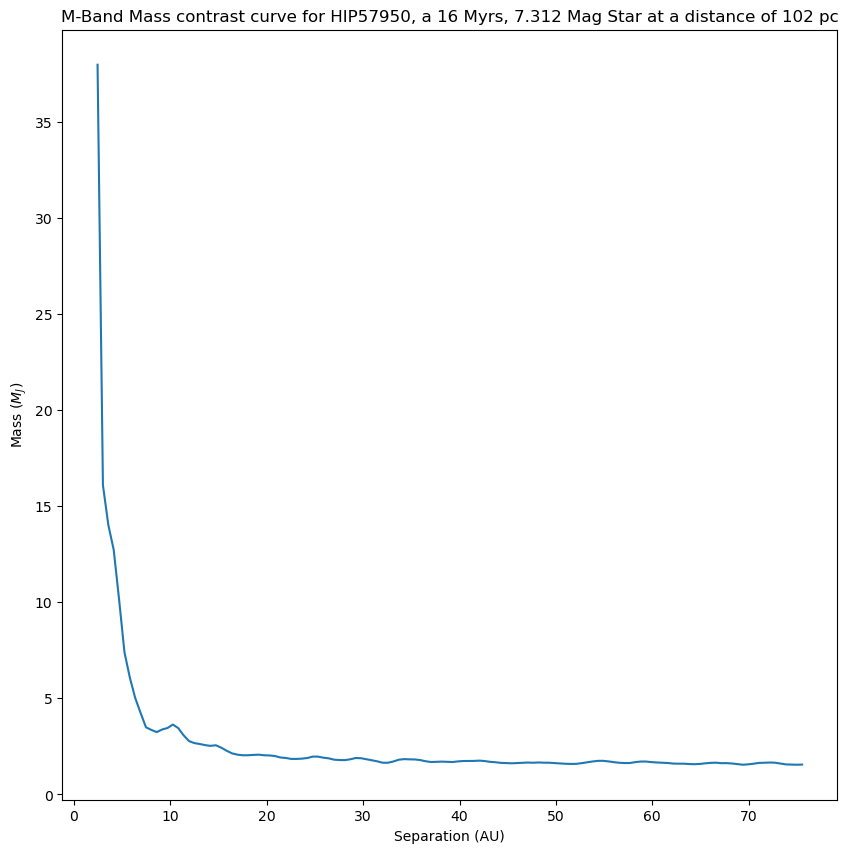

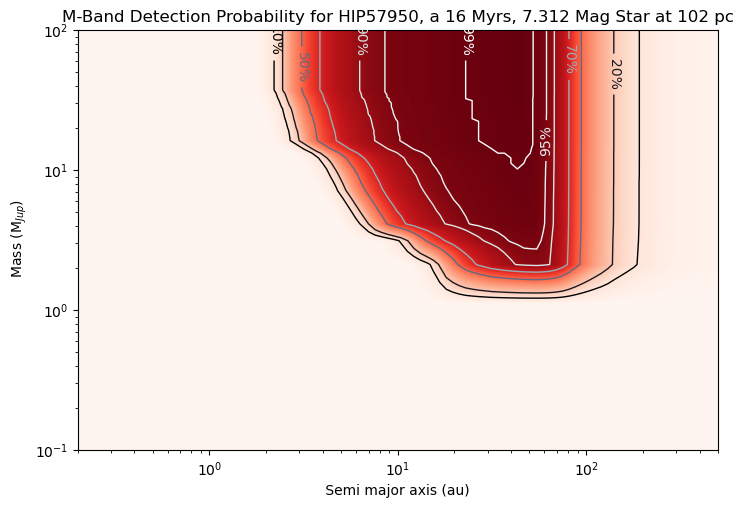

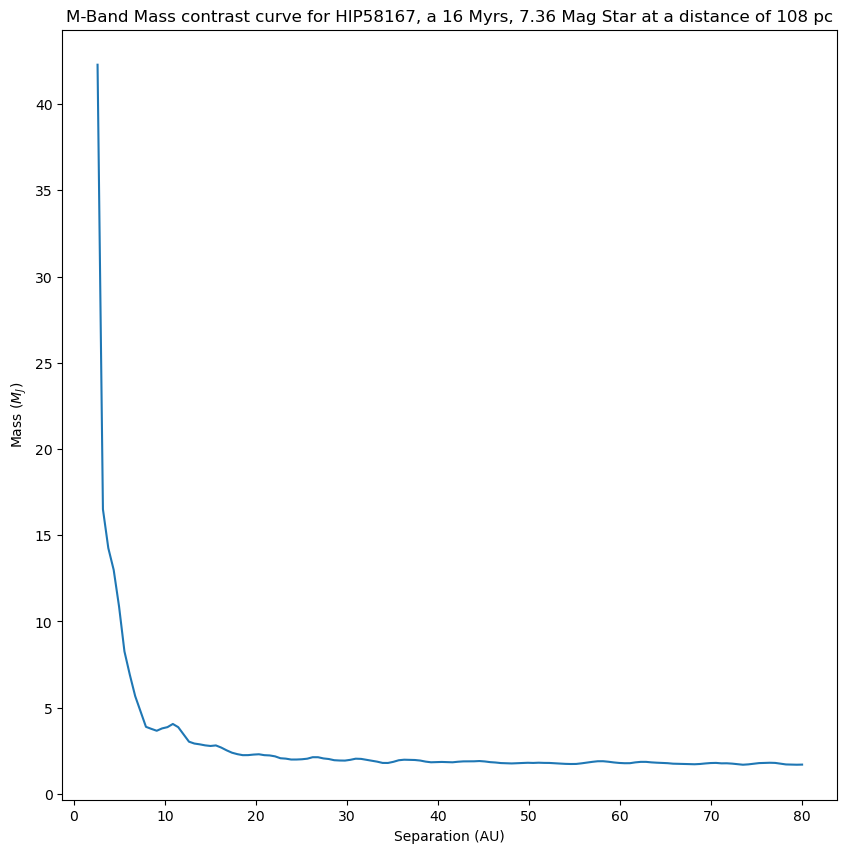

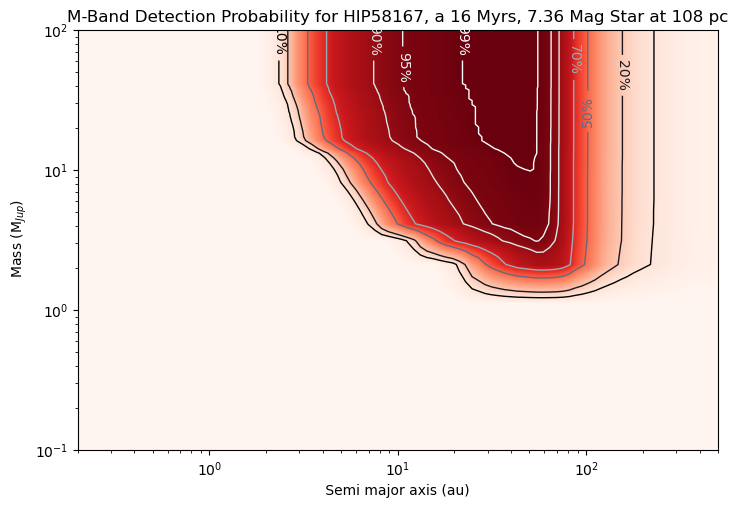

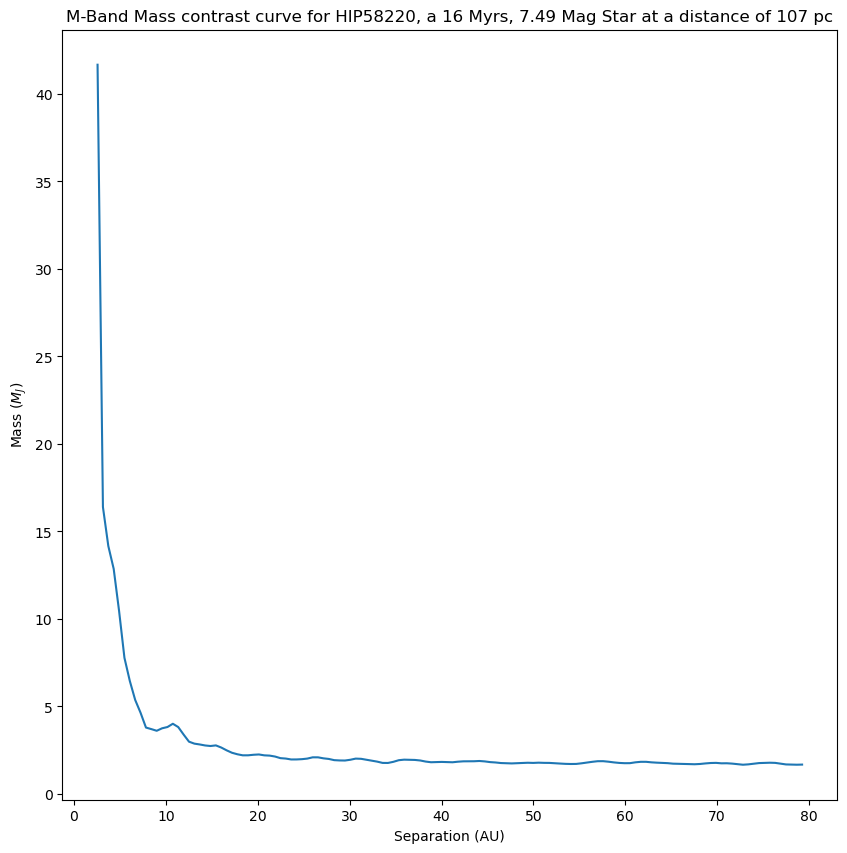

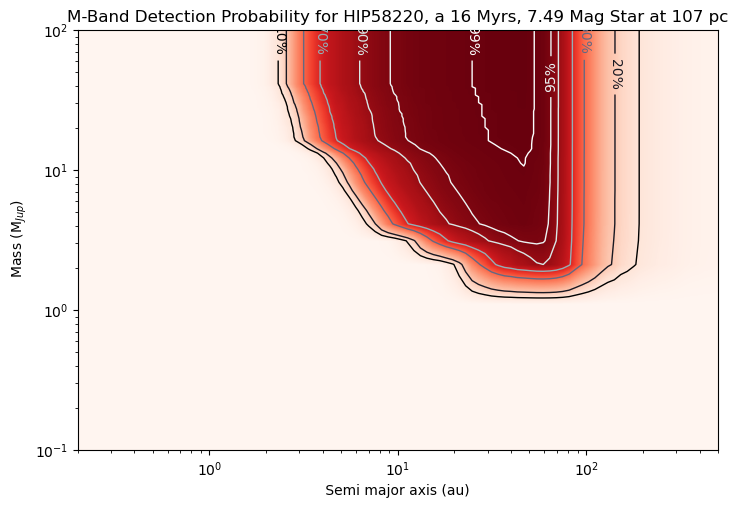

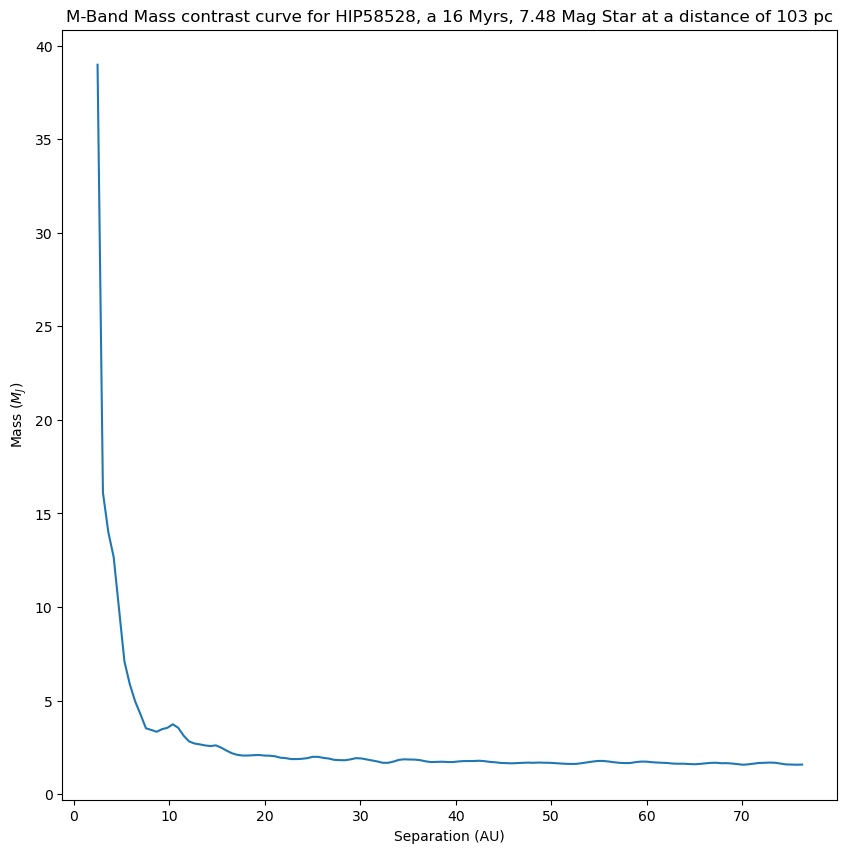

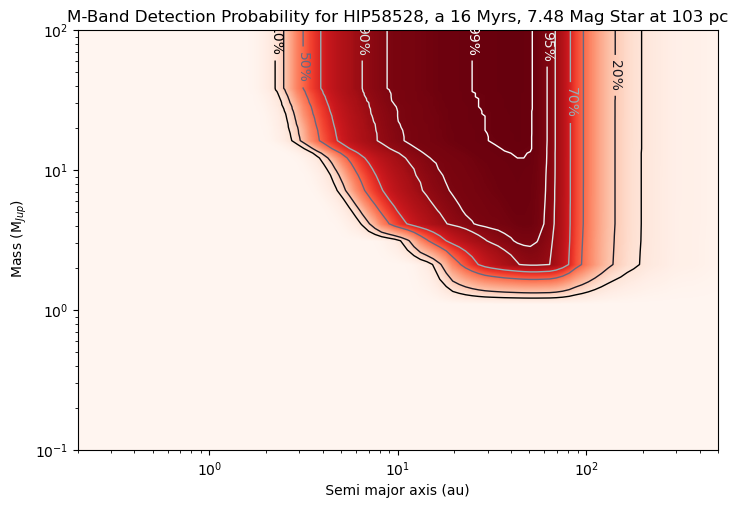

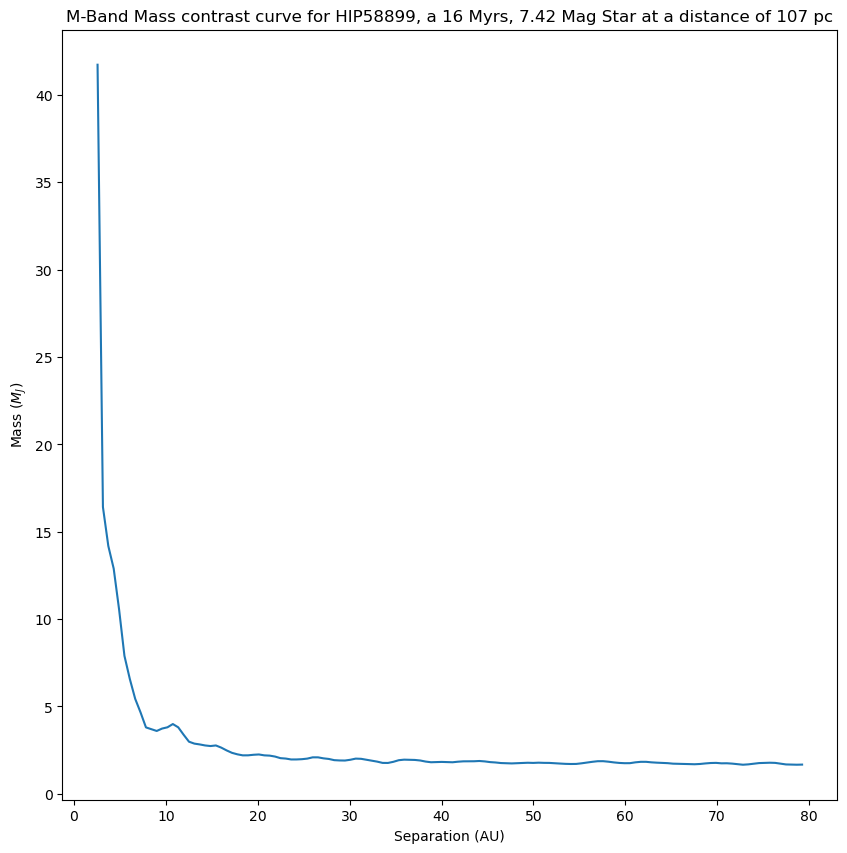

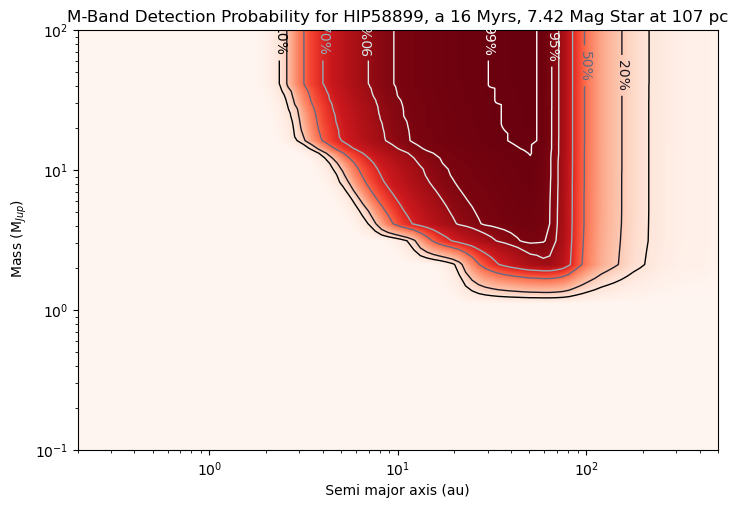

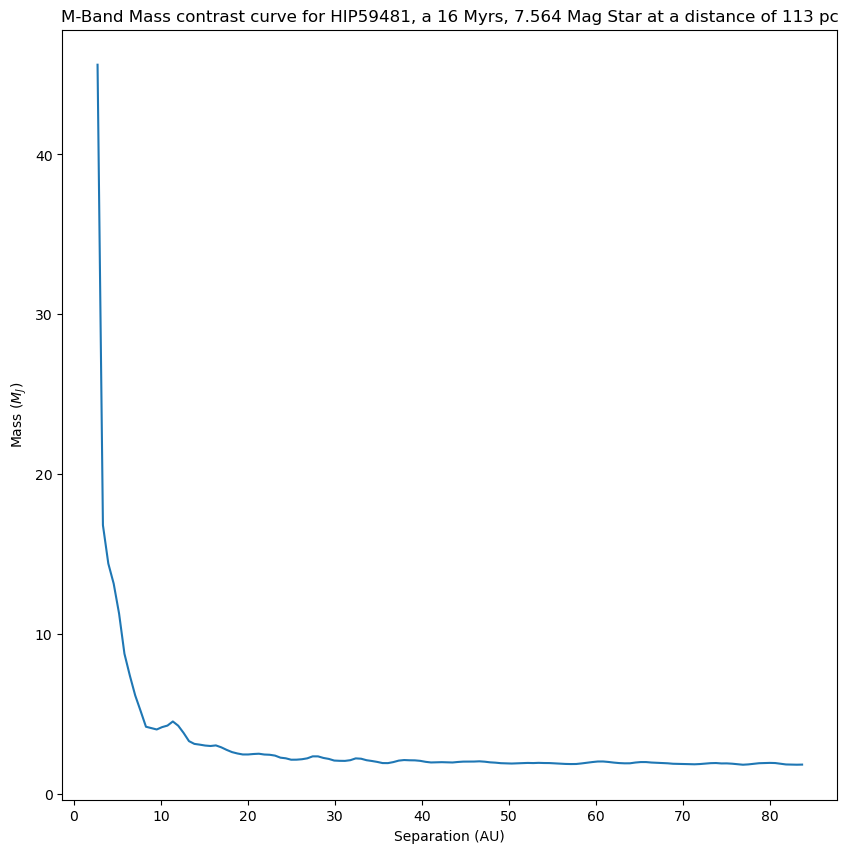

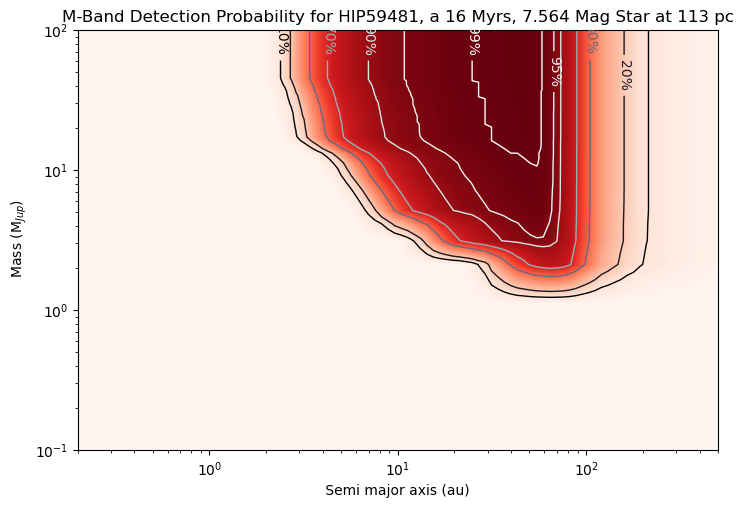

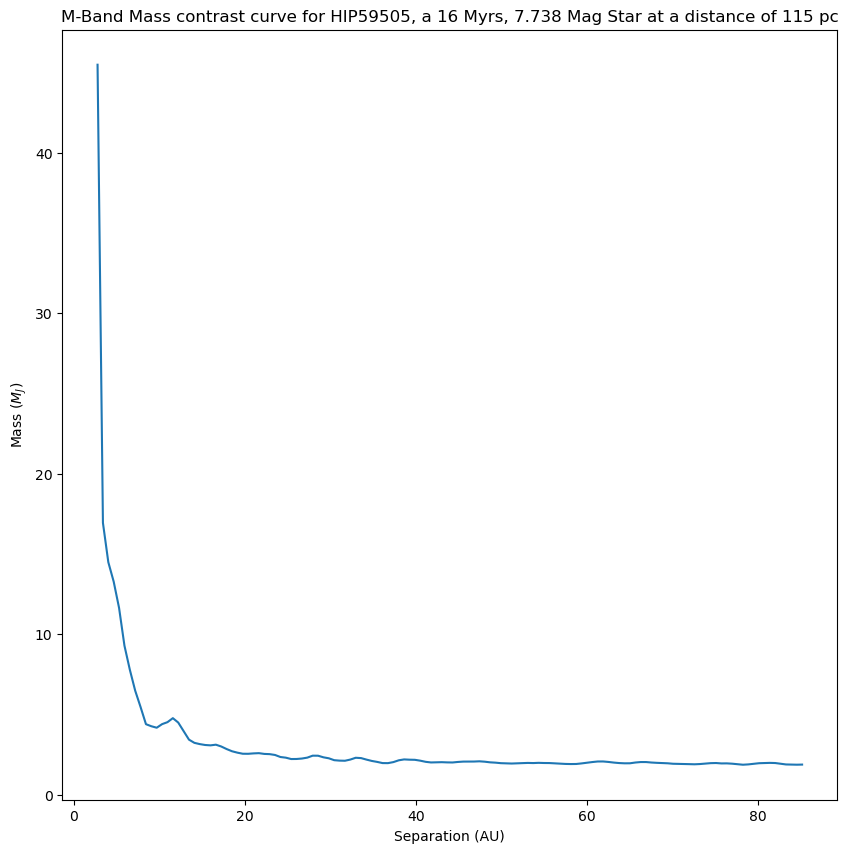

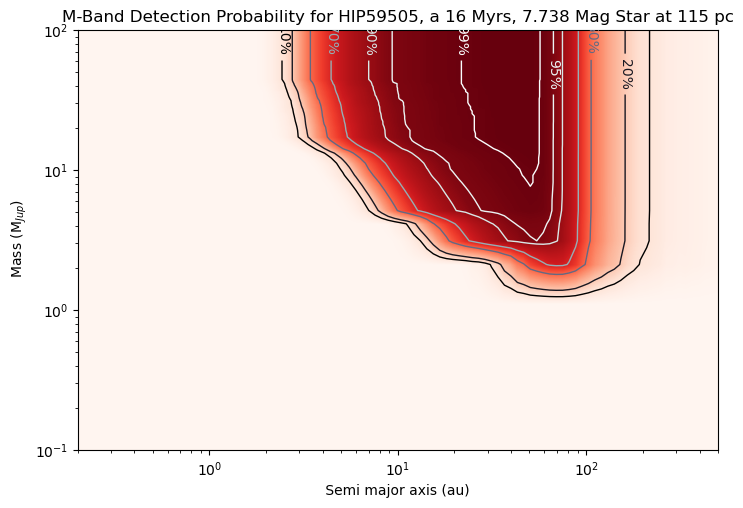

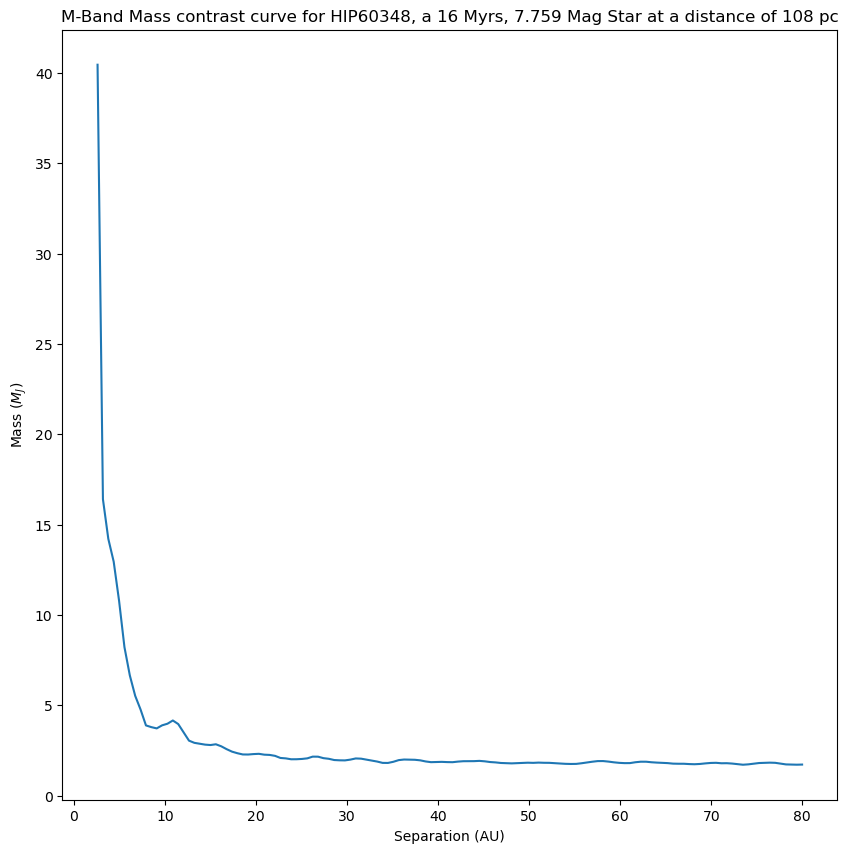

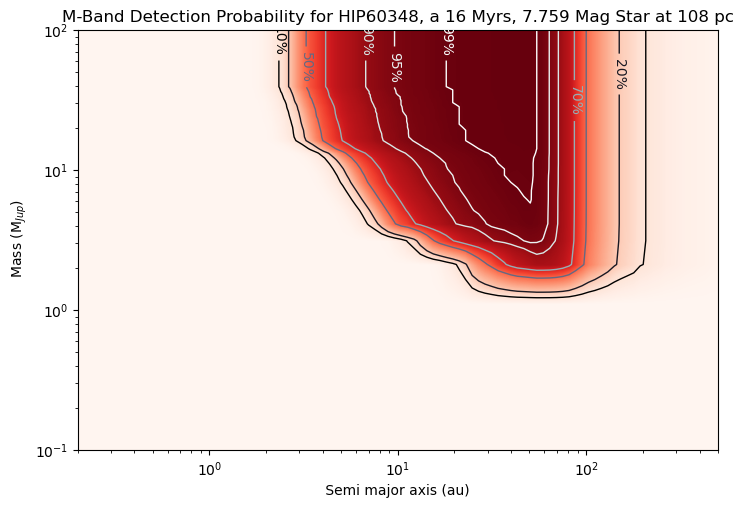

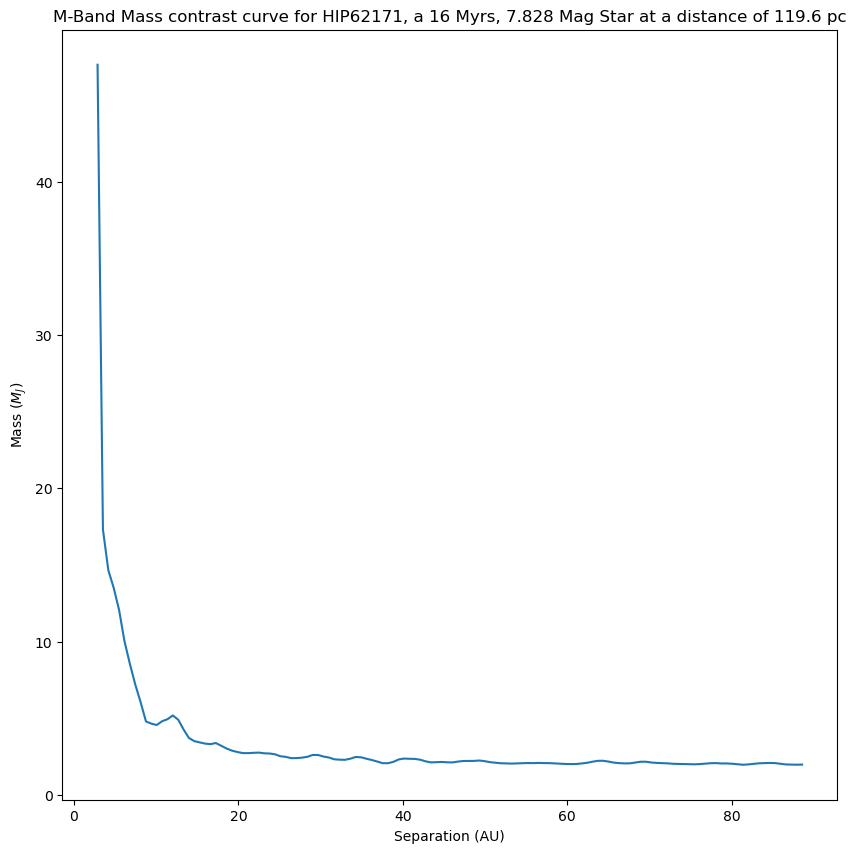

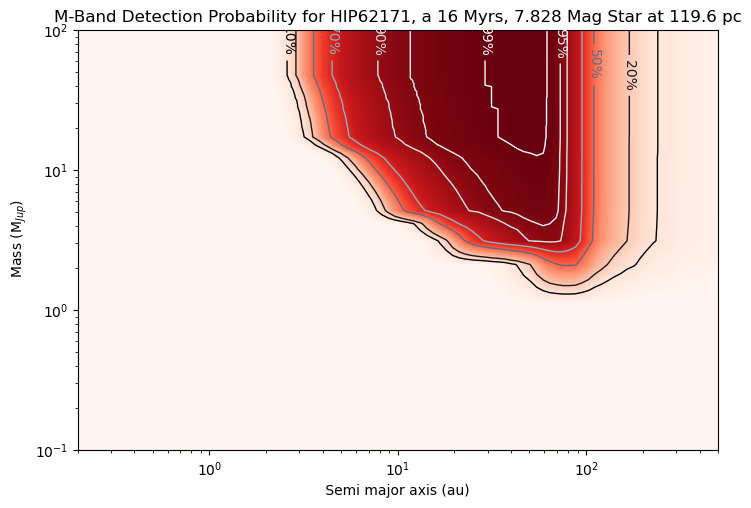

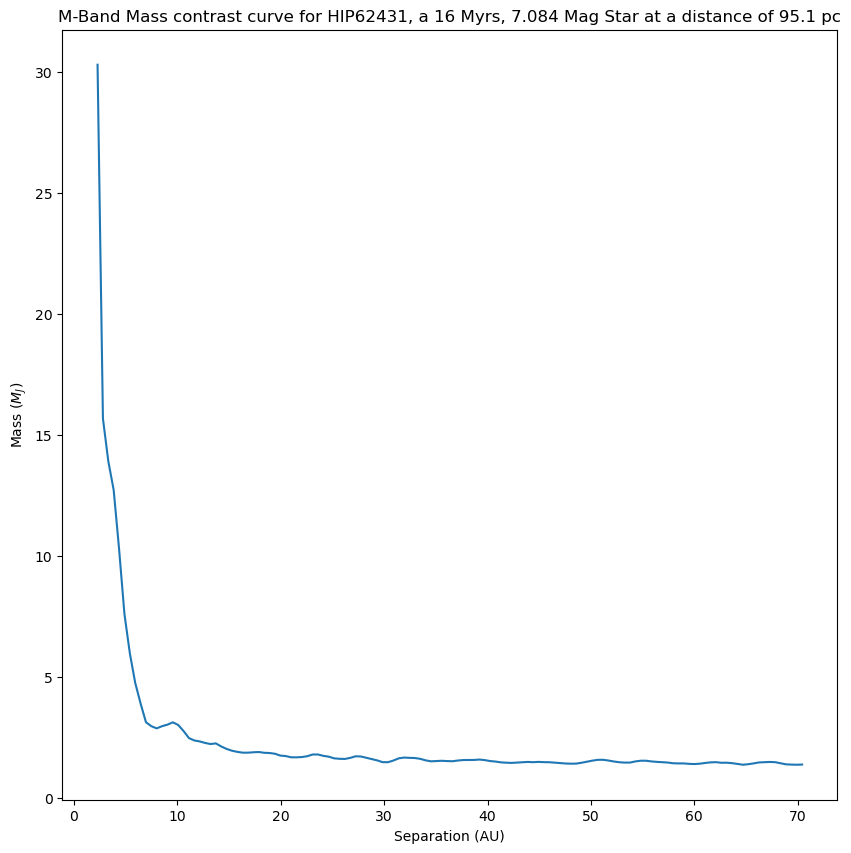

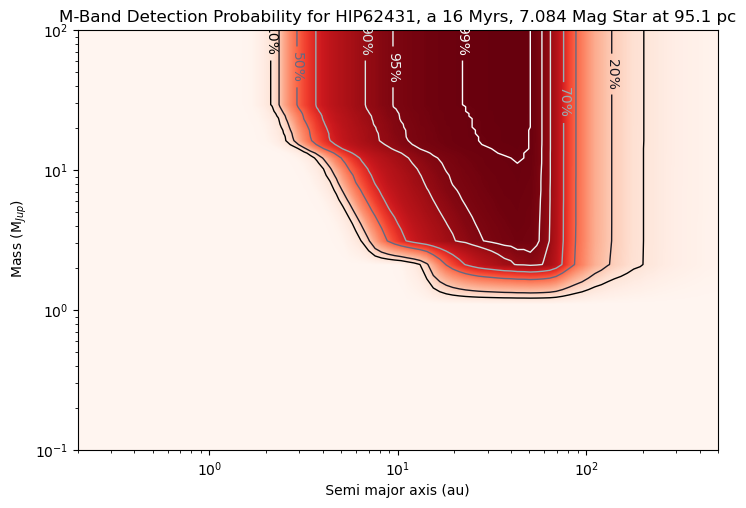

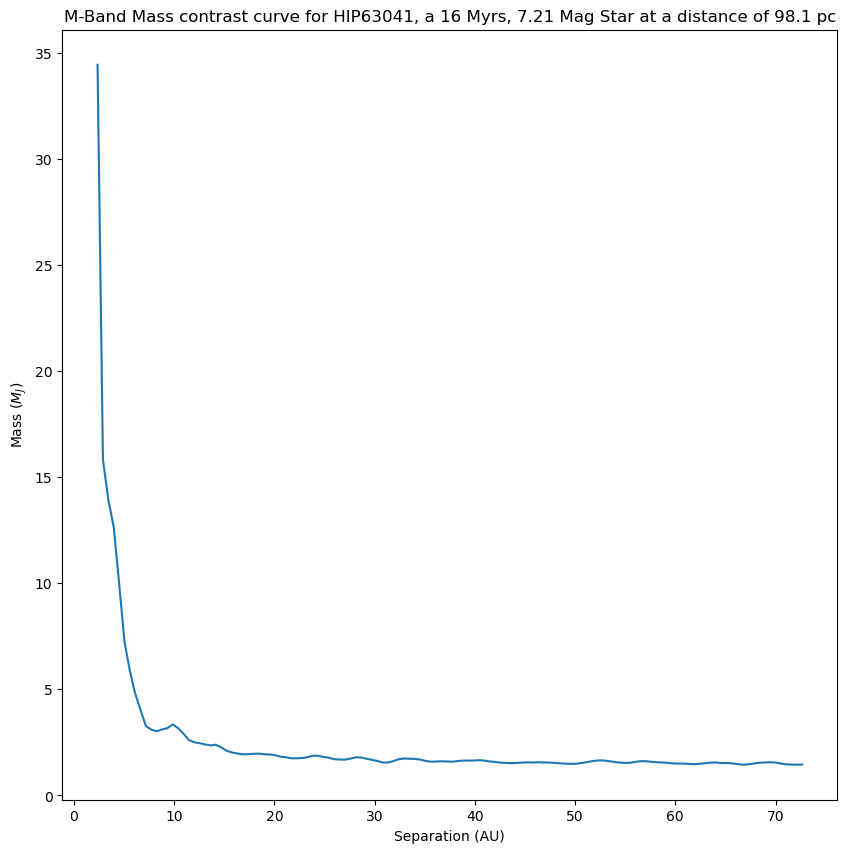

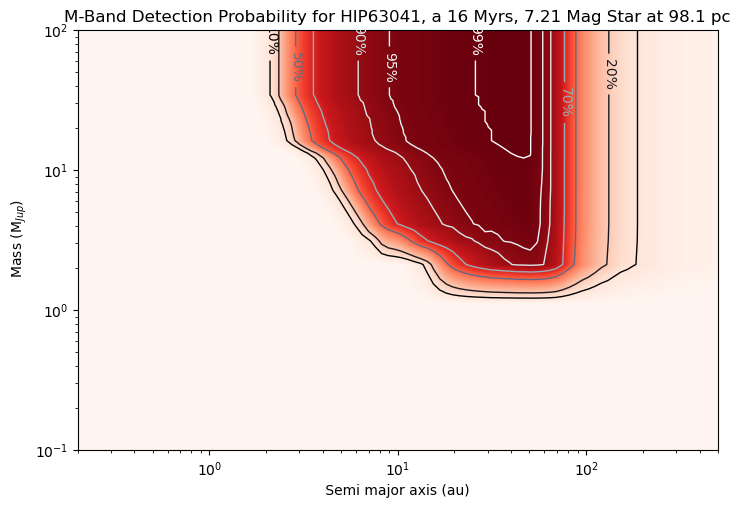

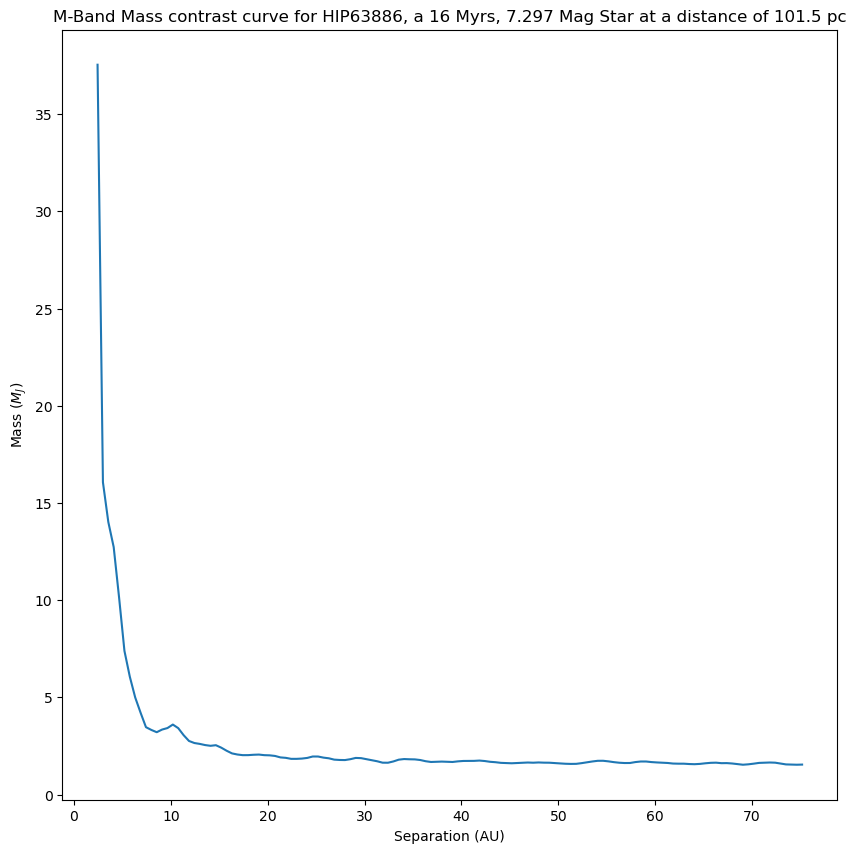

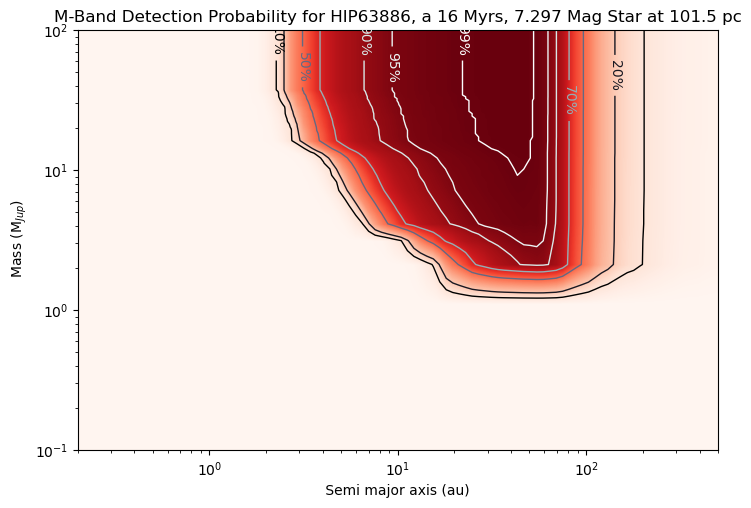

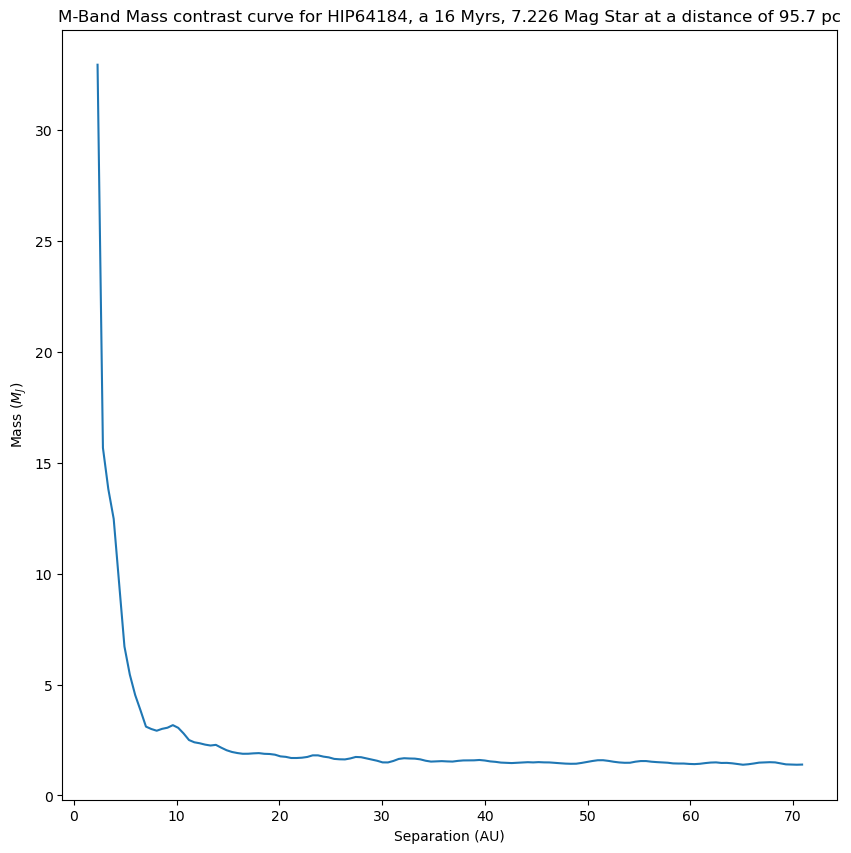

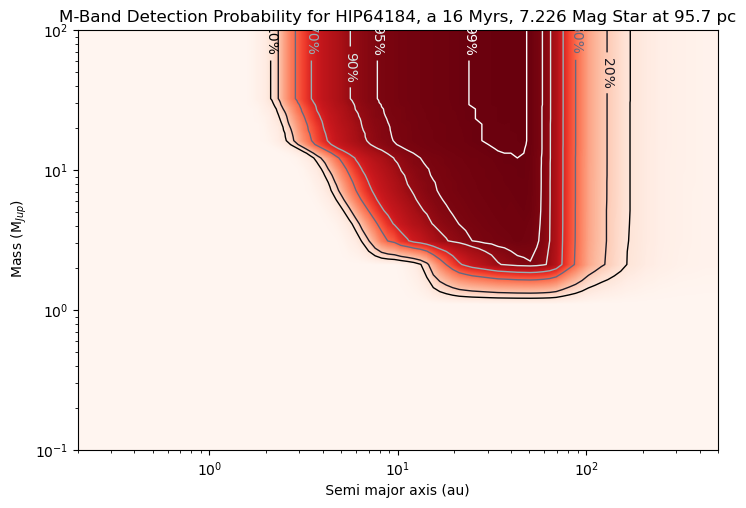

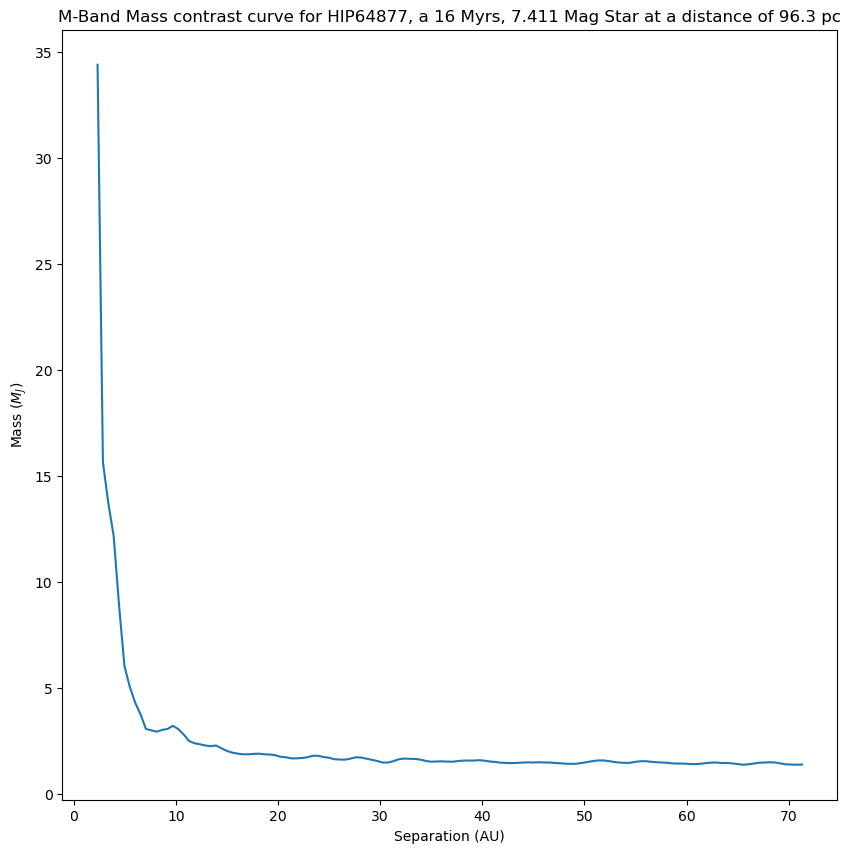

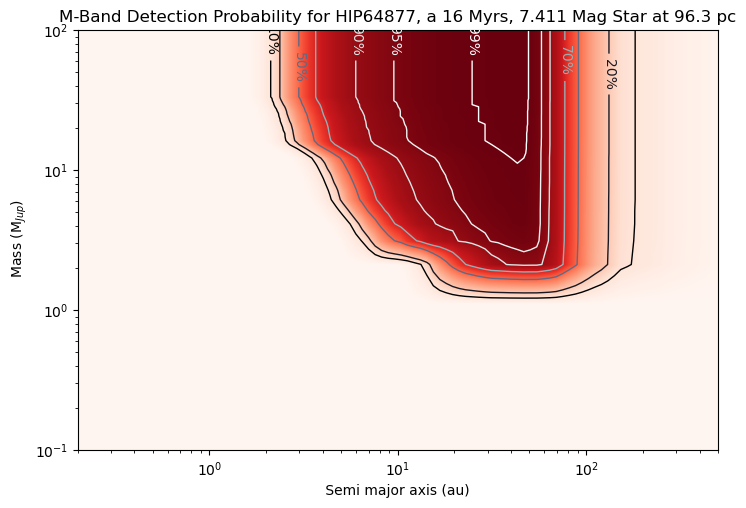

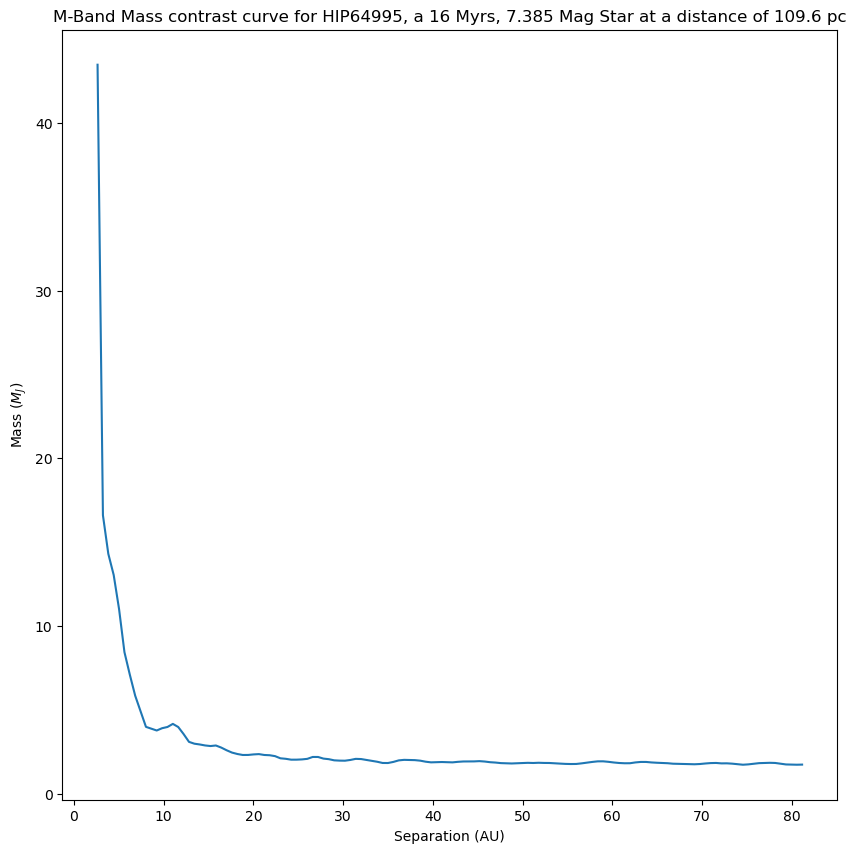

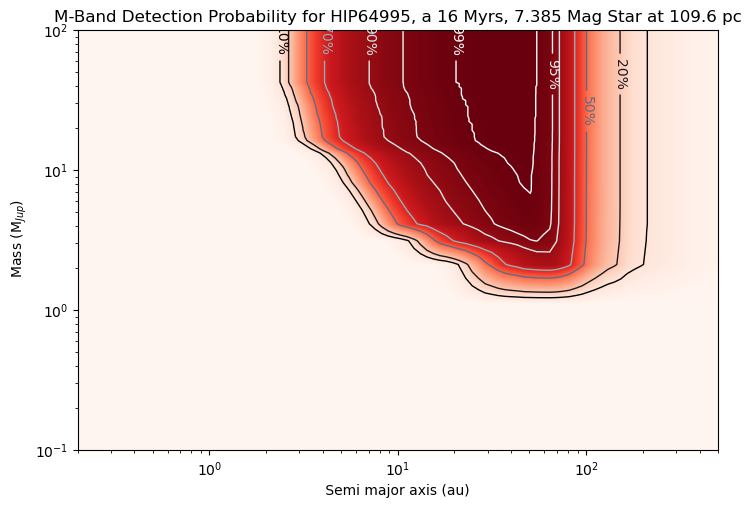

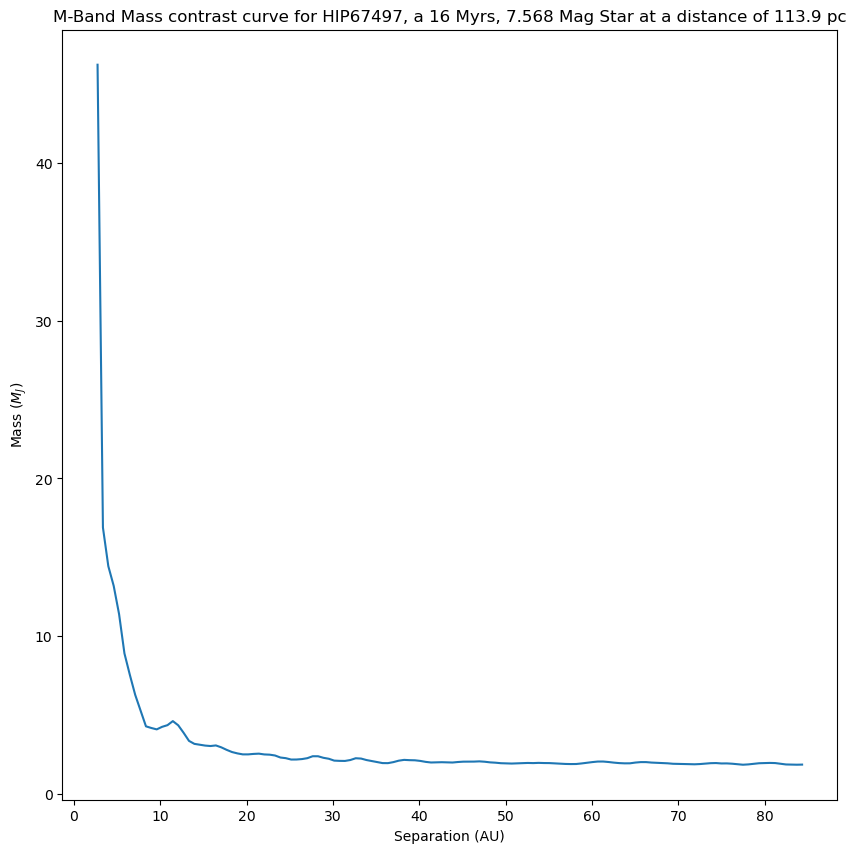

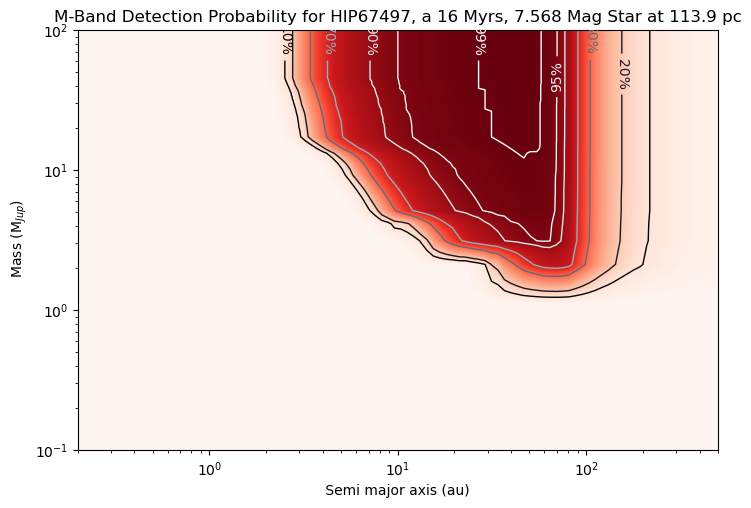

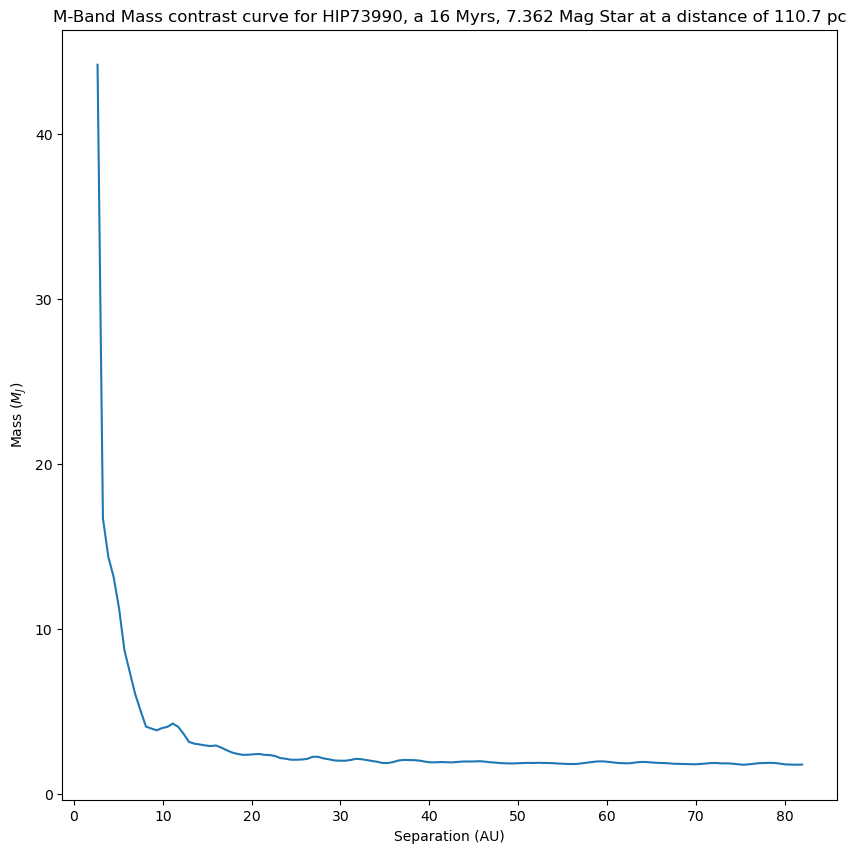

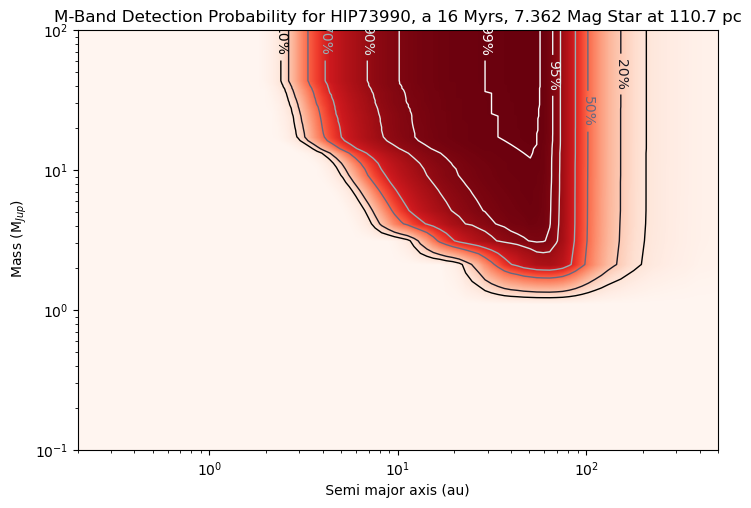

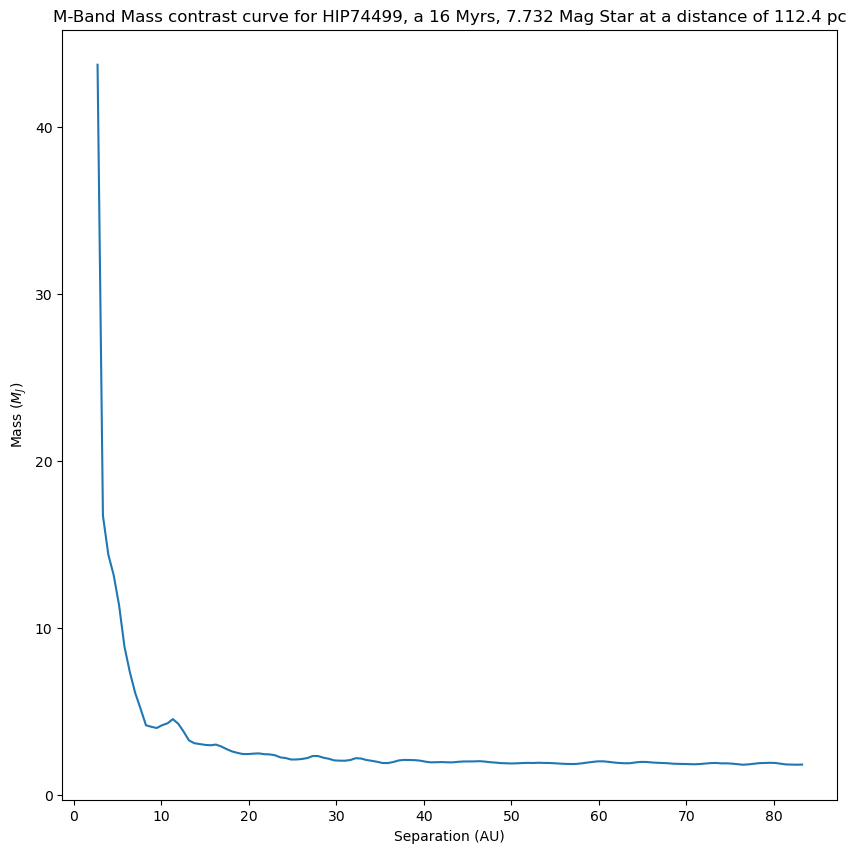

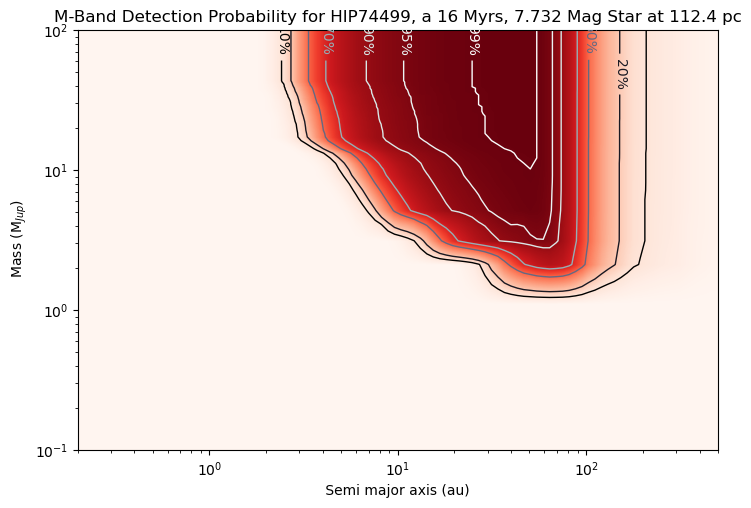

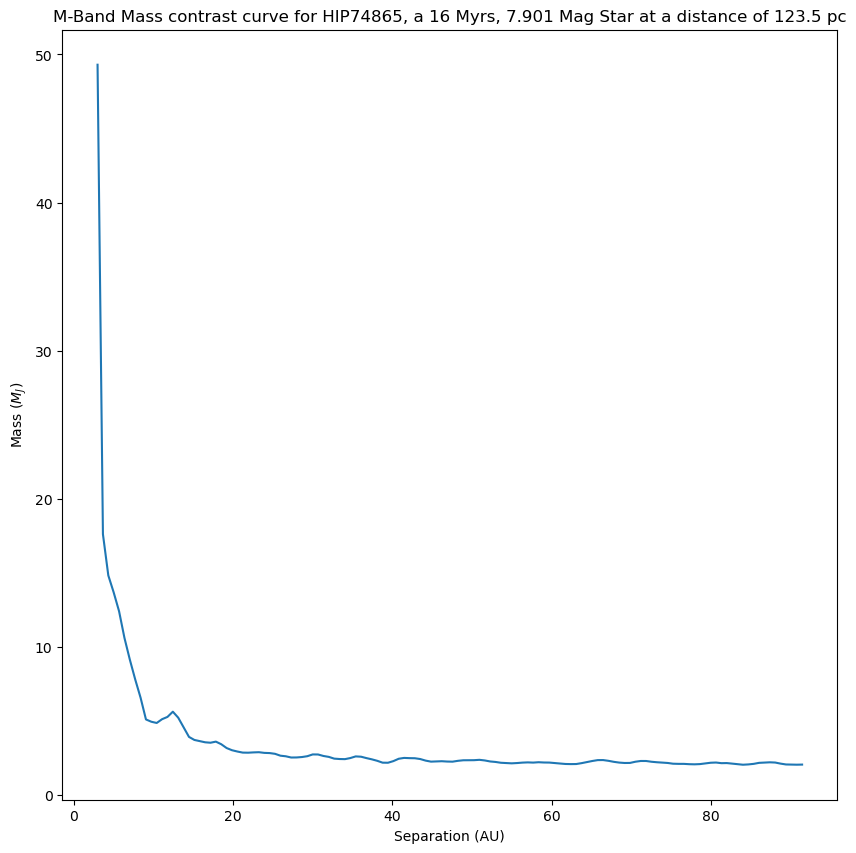

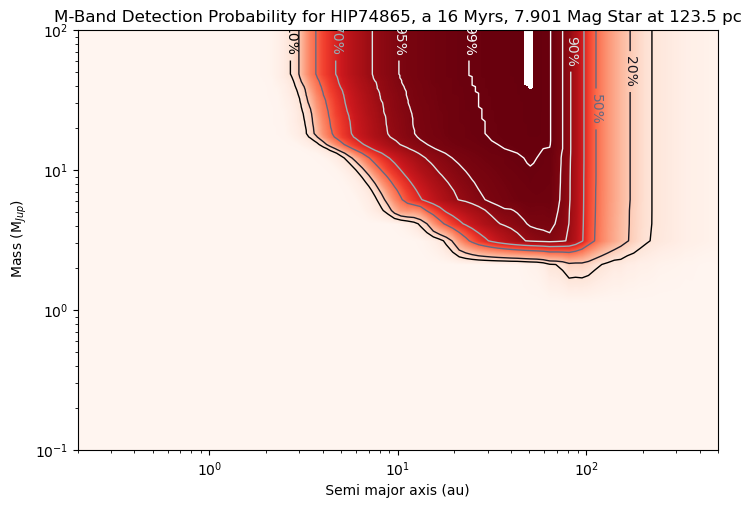

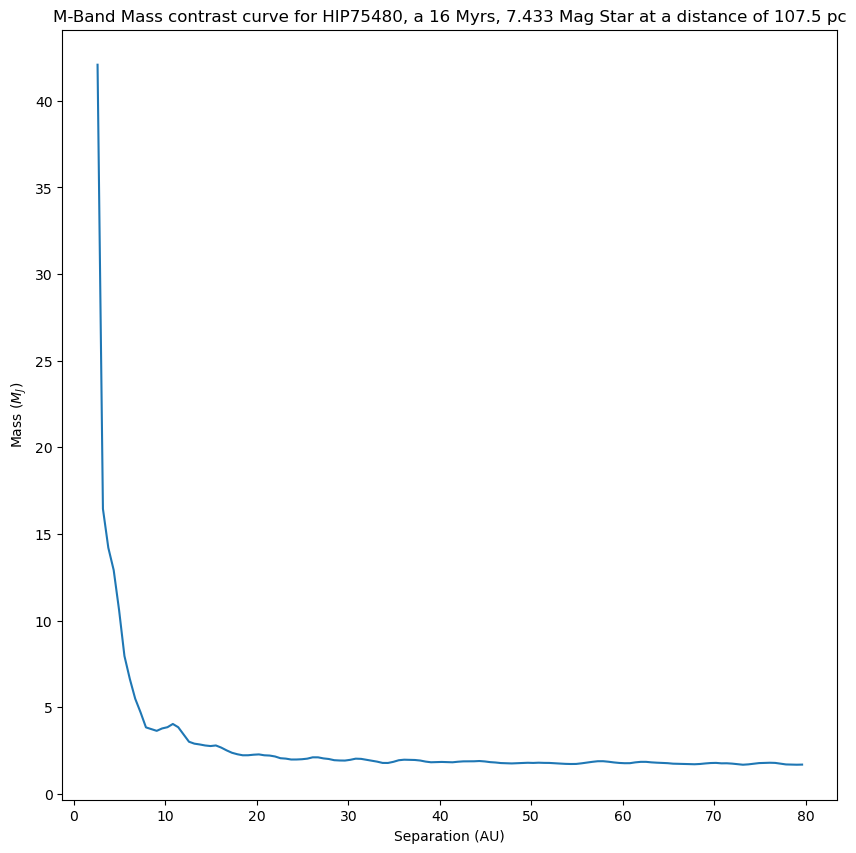

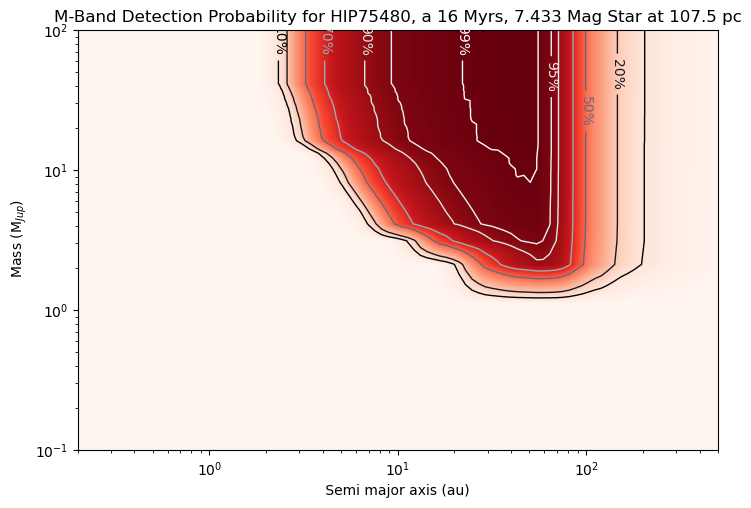

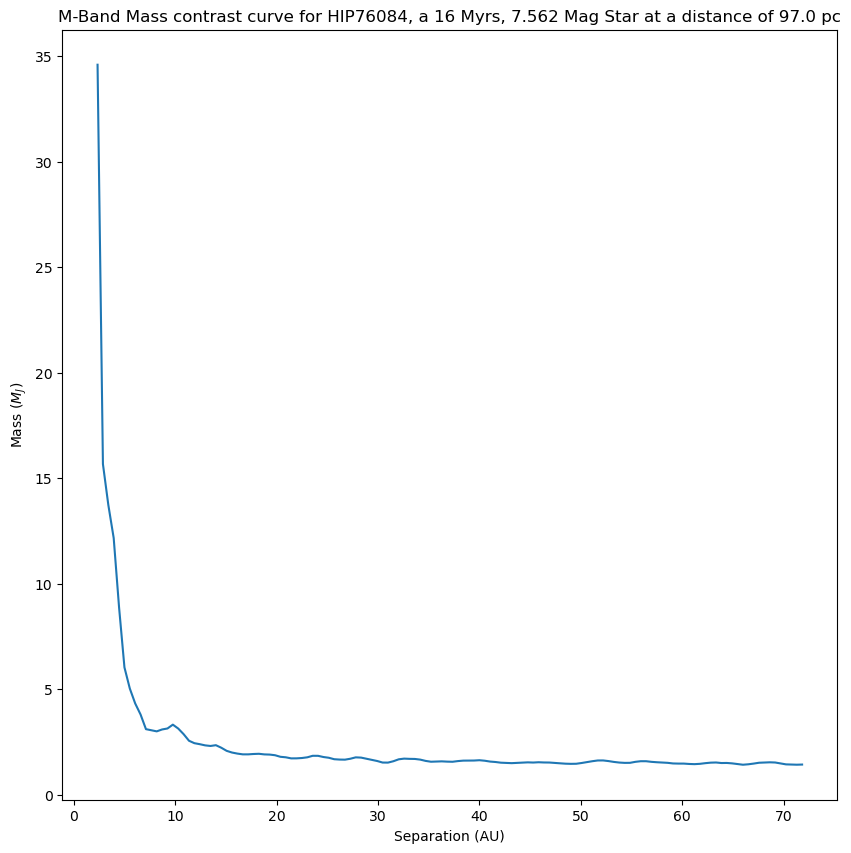

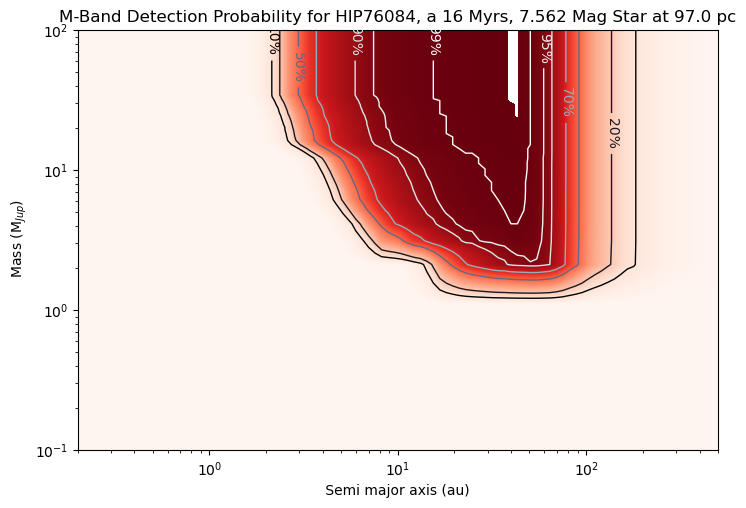

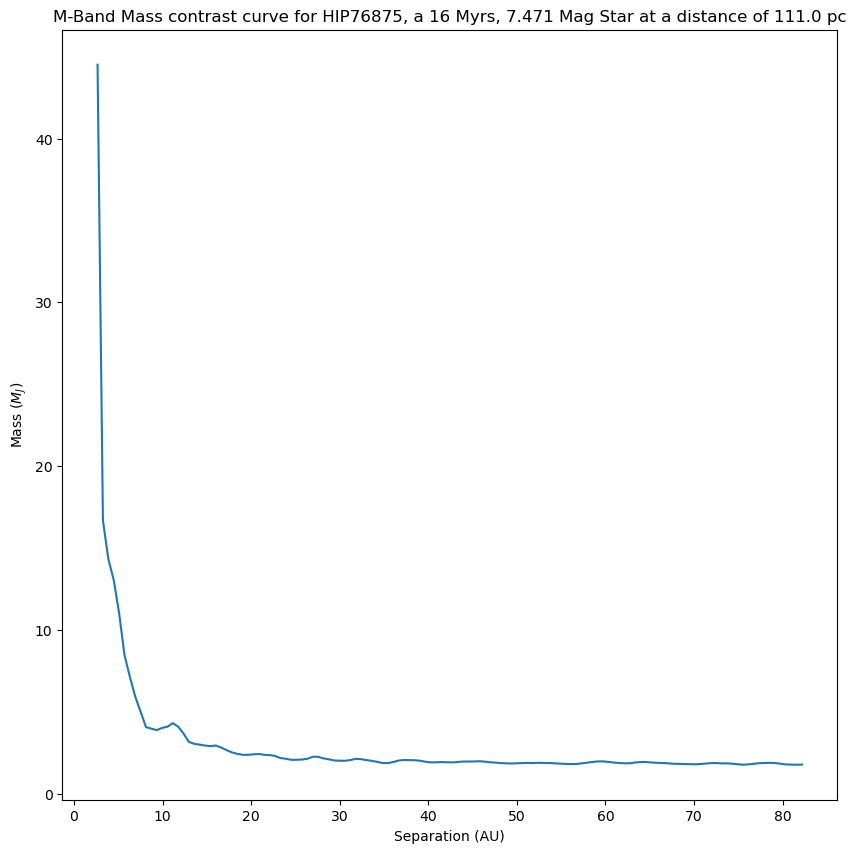

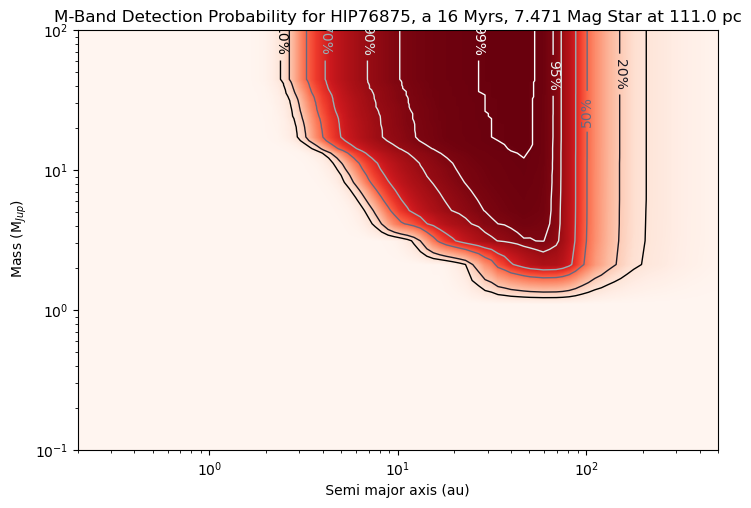

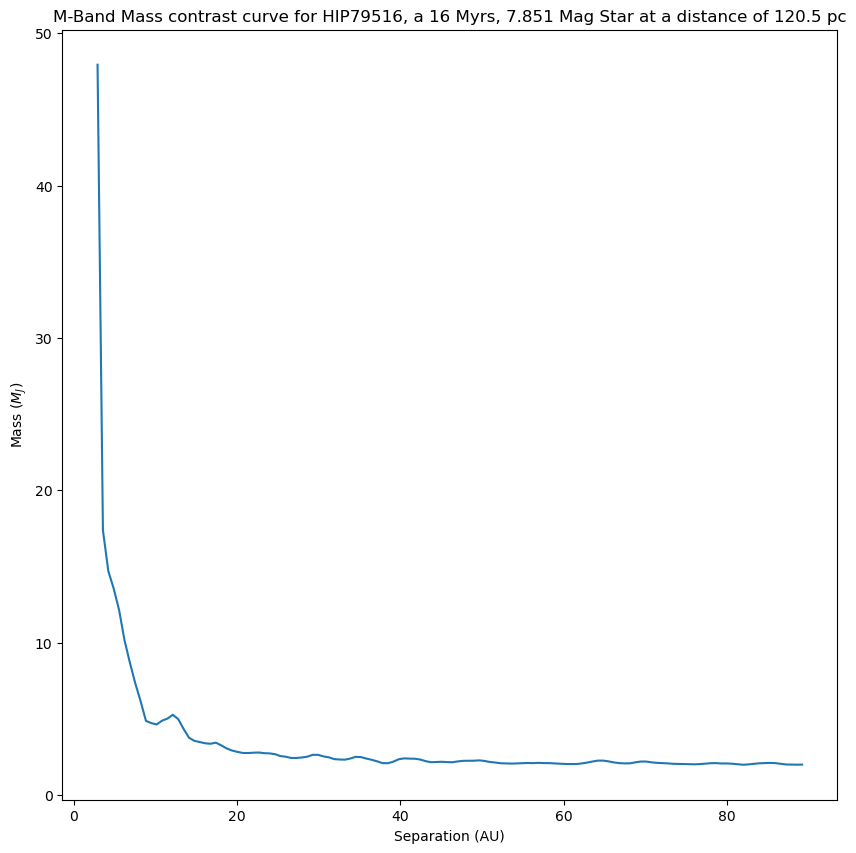

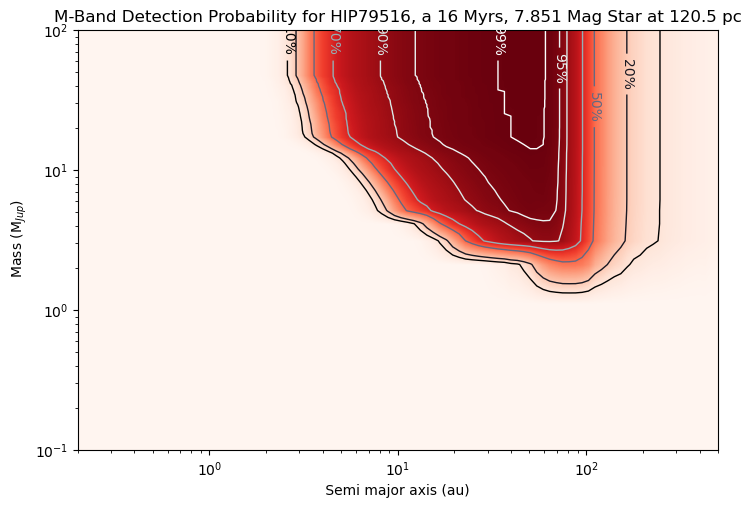

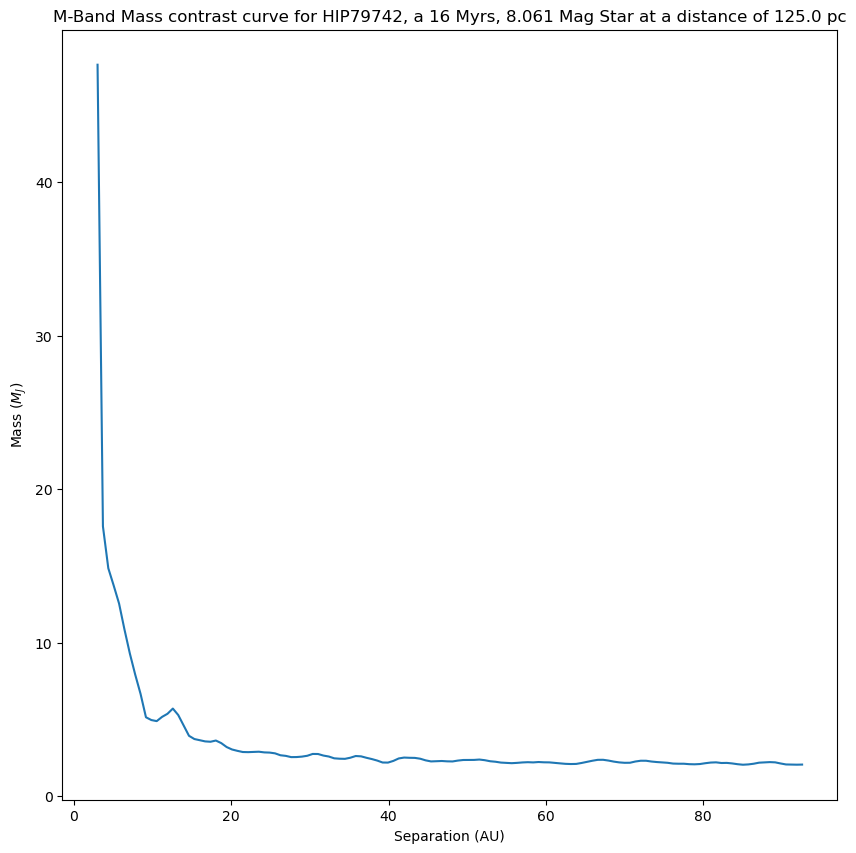

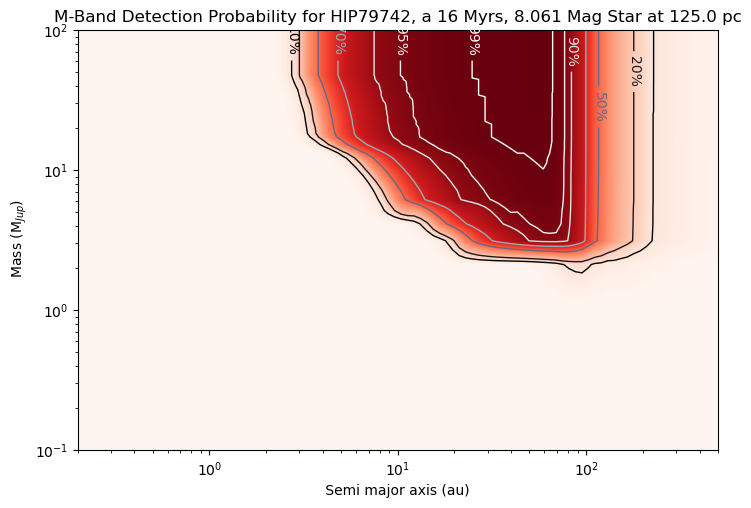

In [6]:
det.plot(model, model_tag, foldername, file_list, file_mag_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder, star_list = star_list, xmin = 0.2, xmax = 500, logx = True)

In [129]:

d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/UCL-LCC/M_band_old/{}_MKO_Mp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/UCL-LCC/L_band_old/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)
map = (mop - map)
for i in range(len(map[0,:])):
    for l in range(len(map[:,0])):
        if map[l,i] <= 0:
            map[l,i] = -map[l,i]
print(map)

[[-0.      -0.      -0.      ... -0.      -0.      -0.     ]
 [-0.      -0.      -0.      ... -0.      -0.      -0.     ]
 [-0.      -0.      -0.      ... -0.      -0.      -0.     ]
 ...
 [-0.      -0.       0.00516 ...  0.00156  0.00156  0.00156]
 [-0.      -0.       0.00388 ...  0.00108  0.00108  0.00108]
 [-0.      -0.       0.00336 ...  0.00088  0.00088  0.00088]]


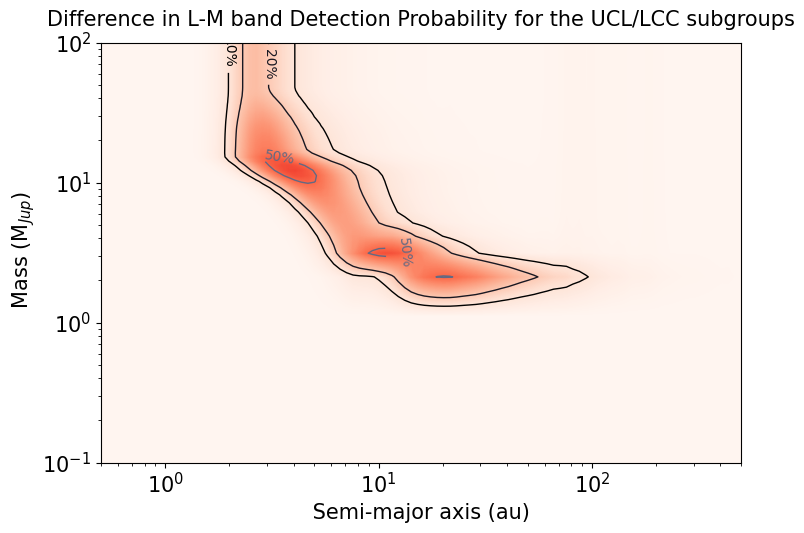

In [127]:
savefilename = 'average_UCL_LCC_L-M'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(1,60),(4,25),(4,14),(10,3)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=10)
ax.set_title('Difference in L-M band Detection Probability for the UCL/LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

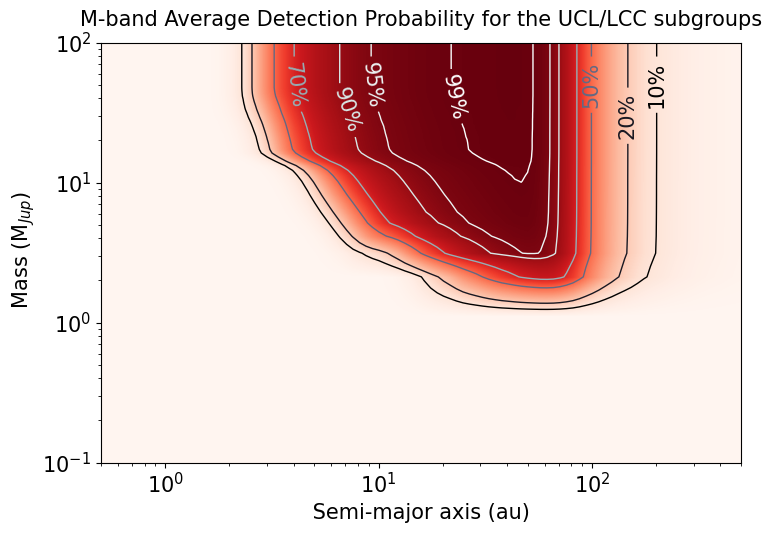

In [66]:
d = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/UCL-LCC/M_band_old/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)

savefilename = 'average_UCL_LCC_MKO_Mp_band'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(200,50),(150,30),(100,50),(4,50),(6,30),(8,50),(20,40)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('M-band Average Detection Probability for the UCL/LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

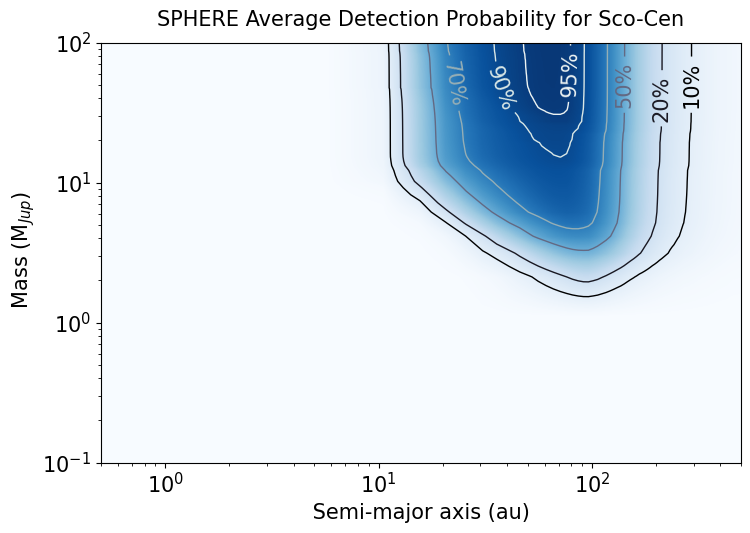

In [101]:
savefilename = 'SHINE'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big'

fig = plt.figure(figsize=(8, 6))

sma = np.linspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)

d = 0
for i in range(26):
    d += np.array(np.genfromtxt("C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/SHINE/scocen/{}_detprob.txt".format(i)))
map = d/26
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Blues', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(300,50),(200,40),(150,50),(20,50),(40,50),(70,60)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('SPHERE Average Detection Probability for Sco-Cen', size = 15, y  =1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

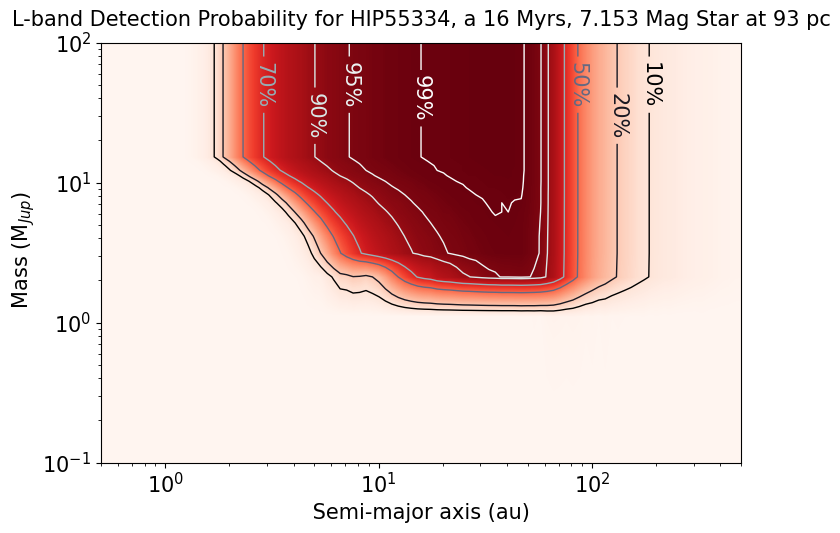

In [4]:

map = np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/UCL-LCC/L_band_old/HIP55334_MKO_Lp_band_detprob.txt'))

savefilename = 'HIP55334_MKO_Lp_band'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(200,50),(150,30),(100,50),(3,50),(6,30),(8,50),(20,40)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('L-band Detection Probability for HIP55334, a 16 Myrs, 7.153 Mag Star at 93 pc', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

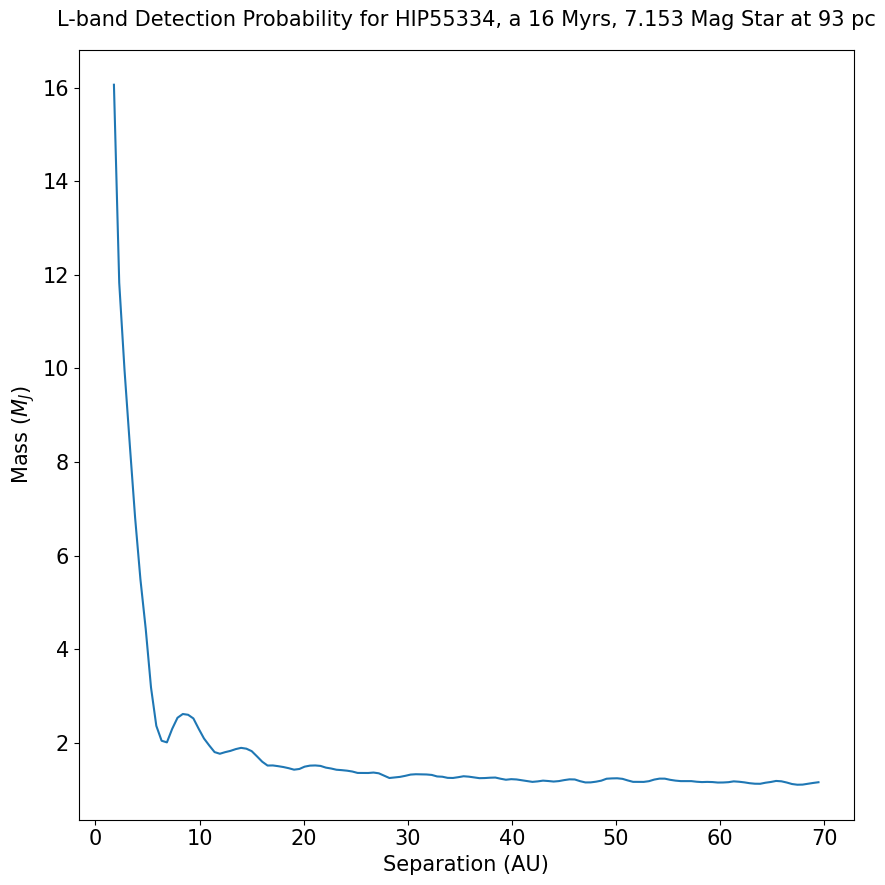

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
cont = np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/UCL-LCC/L_band_old/HIP55334_MKO_Lp_band_cont_data.txt'))
ax.plot(cont[0], cont[1])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Mass ($M_J$)', size = 15)
ax.set_xlabel('Separation (AU)', size = 15)
ax.set_title('L-band Detection Probability for HIP55334, a 16 Myrs, 7.153 Mag Star at 93 pc', size = 15, y = 1.02)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_curve.png', bbox_inches='tight')